A Jupyter Widget

(100, 200)


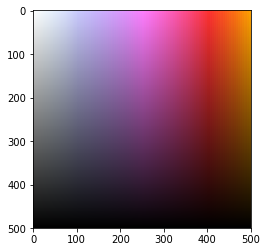

In [73]:
%matplotlib inline 

import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

from IPython.display import display

colors = widgets.IntRangeSlider(
    value=[100, 200],
    min=0,
    max=255.0,
    step=1,
    description='H Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(colors)
#x = np.random.random((500, 500, 3))
#im = plt.imshow(x)

def on_value_change(change):
    print(colors.value)
    lower_b = np.array([int(colors.value[0]), 0, 0])
    upper_b = np.array([int(colors.value[1]), 255, 255])
    s_gradient = np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[1], upper_b[1], 500, dtype=np.uint8)
    v_gradient = np.rot90(np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[2], upper_b[2], 500, dtype=np.uint8))
    h_array = np.ones((500,1), dtype = np.uint8)*np.linspace(lower_b[0], upper_b[0], num=500, dtype=np.uint8)
    hsv_color = cv2.merge((h_array, s_gradient, v_gradient))
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)  
    plt.ion()
    plt.imshow(rgb_color)
    # im.set_data(rgb_color)
    # fig.canvas.draw()
    plt.draw()

    
on_value_change(0)
colors.observe(on_value_change, names='value')
# fig.canvas.mpl_connect('on_value_change', on_value_change)


Source Image (RGB)


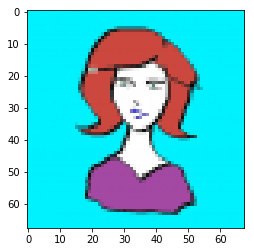

Source Image (HSV)


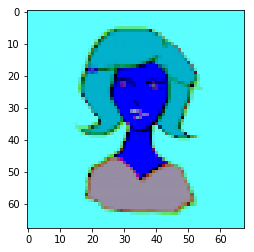

In [74]:
source_img_rgb = cv2.imread('original.png')
print("Source Image (RGB)")
plt.imshow(source_img_rgb) # Source Image (RGB)
plt.show()

# Переход в пространство HSV
source_image_hsv = cv2.cvtColor(source_img_rgb, cv2.COLOR_RGB2HSV)
print("Source Image (HSV)")
plt.imshow(source_image_hsv) # Source Image (HSV)
plt.show()


In [75]:
# Применение маски
mask = np.zeros(shape=(source_img_rgb.shape[0], source_img_rgb.shape[1]), dtype=bool)
mask = cv2.inRange(source_image_hsv, lower_b, upper_b)

res_image_hsv = cv2.bitwise_and(source_image_hsv, source_image_hsv, mask=mask)
res_image_rgb = cv2.cvtColor(res_image_hsv, cv2.COLOR_HSV2RGB)

RESULT image (HSV)


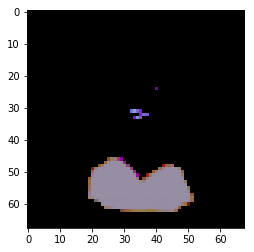

RESULT image (RGB)


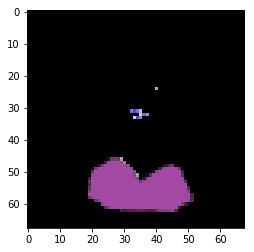

In [76]:

print("RESULT image (HSV)")
plt.imshow(res_image_hsv) # "RESULT image (HSV)"
plt.show()
print("RESULT image (RGB)")
plt.imshow(res_image_rgb) # "RESULT image (RGB)"
plt.show()

mpimg.imsave("result_dz_0.png", res_image_rgb)
